<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/neural%20network/imdb_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying Movie Reviews
- Binary Classification on IMDB Dataset
- Input - 50,000 Reviews
- Output: Positive and Negative

In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preparation

In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
XT.shape,YT.shape,Xt.shape,Yt.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
 word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
type(word_idx)

dict

In [7]:
# print(word_idx)

In [8]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [9]:
# print(idx_word)

In [ ]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]]) 
# the  idx - 3 was used as the dict adds three words automatically 

In [ ]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Next Step - Vectorize the data
##### Vocab- size -10,000 I Will make sure it is representes as len 10,000  

In [ ]:
def vectorize_sentence(sentences,dim=10000):
  outputs = np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    outputs[i][idx] = 1
  return outputs  

In [ ]:
X_train = vectorize_sentence(XT)
X_test = vectorize_sentence(Xt)

In [ ]:
X_train.shape,X_test.shape

((25000, 10000), (25000, 10000))

In [ ]:
Y_train  = np.array(YT).astype('float32')
Y_test  = np.array(Yt).astype('float32')

# Build the network

#### Define your Model Artchitecture
- Use fully Connected/Dence Layers with RelU Activation 
- 2 Hidden Layers with 16 units each
- 1 Output layer with 1 unit(Sigmoid Activation)

In [ ]:
from keras import models
from keras.layers import Dense

In [ ]:
## define the model 
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu',))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
## Compile the model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training and Validation

In [ ]:
x_val =X_train[:5000]
x_train = X_train[5000:]

y_val = Y_train[:5000]
y_train = Y_train[5000:]

In [ ]:
hist = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1837 - accuracy: 0.9329 - val_loss: 0.2242 - val_accuracy: 0.9110
Epoch 2/20
40/40 [==============================] - 1s 33ms/step - loss: 0.1652 - accuracy: 0.9394 - val_loss: 0.1979 - val_accuracy: 0.9286
Epoch 3/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1421 - accuracy: 0.9500 - val_loss: 0.2127 - val_accuracy: 0.9224
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1222 - accuracy: 0.9575 - val_loss: 0.2268 - val_accuracy: 0.9184
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1037 - accuracy: 0.9665 - val_loss: 0.2413 - val_accuracy: 0.9140
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0889 - accuracy: 0.9714 - val_loss: 0.2612 - val_accuracy: 0.9110
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.2852 - val_accuracy: 0.9046
Epoch 8/20
40

## Visualize our results

In [ ]:
# hist.history

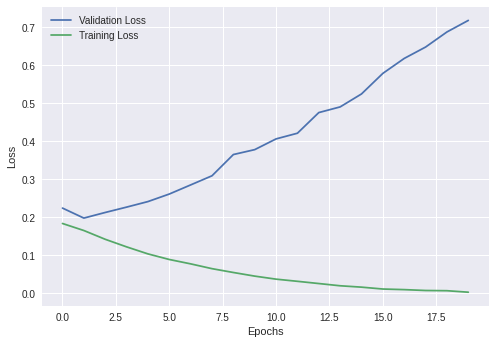

In [ ]:
plt.style.use('seaborn')
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.plot(hist.history['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

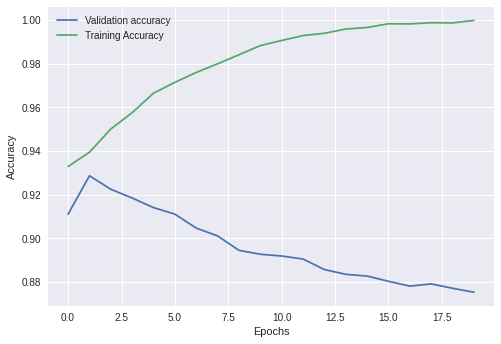

In [ ]:
plt.style.use('seaborn')
plt.plot(hist.history['val_accuracy'],label="Validation accuracy")
plt.plot(hist.history['accuracy'],label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
hist = model.fit(x_train,y_train,epochs=2,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/2
40/40 [==============================] - 1s 19ms/step - loss: 0.2050 - accuracy: 0.9288 - val_loss: 0.2669 - val_accuracy: 0.8924
Epoch 2/2
40/40 [==============================] - 1s 17ms/step - loss: 0.1664 - accuracy: 0.9431 - val_loss: 0.2841 - val_accuracy: 0.8886


In [ ]:
model.evaluate(X_test,Y_test)[1]

782/782 [==============================] - 1s 1ms/step - loss: 0.3102 - accuracy: 0.8770


0.8770400285720825

In [ ]:
model.evaluate(X_train,Y_train)

782/782 [==============================] - 1s 1ms/step - loss: 0.1632 - accuracy: 0.9450


[0.16322055459022522, 0.9449999928474426]

In [ ]:
model.predict(X_test)

array([[0.16901314],
       [0.9982569 ],
       [0.56089115],
       ...,
       [0.08350691],
       [0.06559199],
       [0.41029122]], dtype=float32)